In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:

sampcycle = [1049, 1170, 1278, 1391, 1502, 1638]
ec31 = pd.read_csv('../../../ProjectData/Chibio_Modelling/Data/23-10-07 data 062_4/2023-10-07 20_22_24_M0_data.csv')
C8M0 = pd.read_csv('../../Ting/Experiments/061-2/2023-09-07 16_28_56_M0_data.csv')
FC_file = pd.read_excel('../../Ting/Experiments/061-2/230915 Facility Analysis Manual Count.xlsx',header=[1])
FC_data = FC_file['% Parent.1'] + FC_file['% Parent.2']
C8M0_FCEc = FC_data[1:-1:7]
C8M0hrs = C8M0["exp_time"][sampcycle[0]:sampcycle[-1]].to_numpy()/3600
sim_h = C8M0hrs[-1]-C8M0hrs[0]
plt.plot(C8M0["exp_time"][1049:1638],C8M0["media_temp"][1049:1638])
ec31.head()

# C8M0hrs = C8M0["exp_time"][sampcycle[0]:sampcycle[-1]]/3600
# C8M0hrs = C8M0hrs.to_numpy()
# C8M0od = C8M0["od_measured"][sampcycle[0]:sampcycle[-1]]
# C8M0tem = C8M0["media_temp"][sampcycle[0]:sampcycle[-1]]
# sim_h = C8M0hrs[-1]-C8M0hrs[0]
# data_l = int(sim_h*3600/10)
# time_arr = np.arange(0,sim_h,10/3600)
# C8M0tem[C8M0hrs>time_arr]

cb_fc_ec information of 067-2 not given.


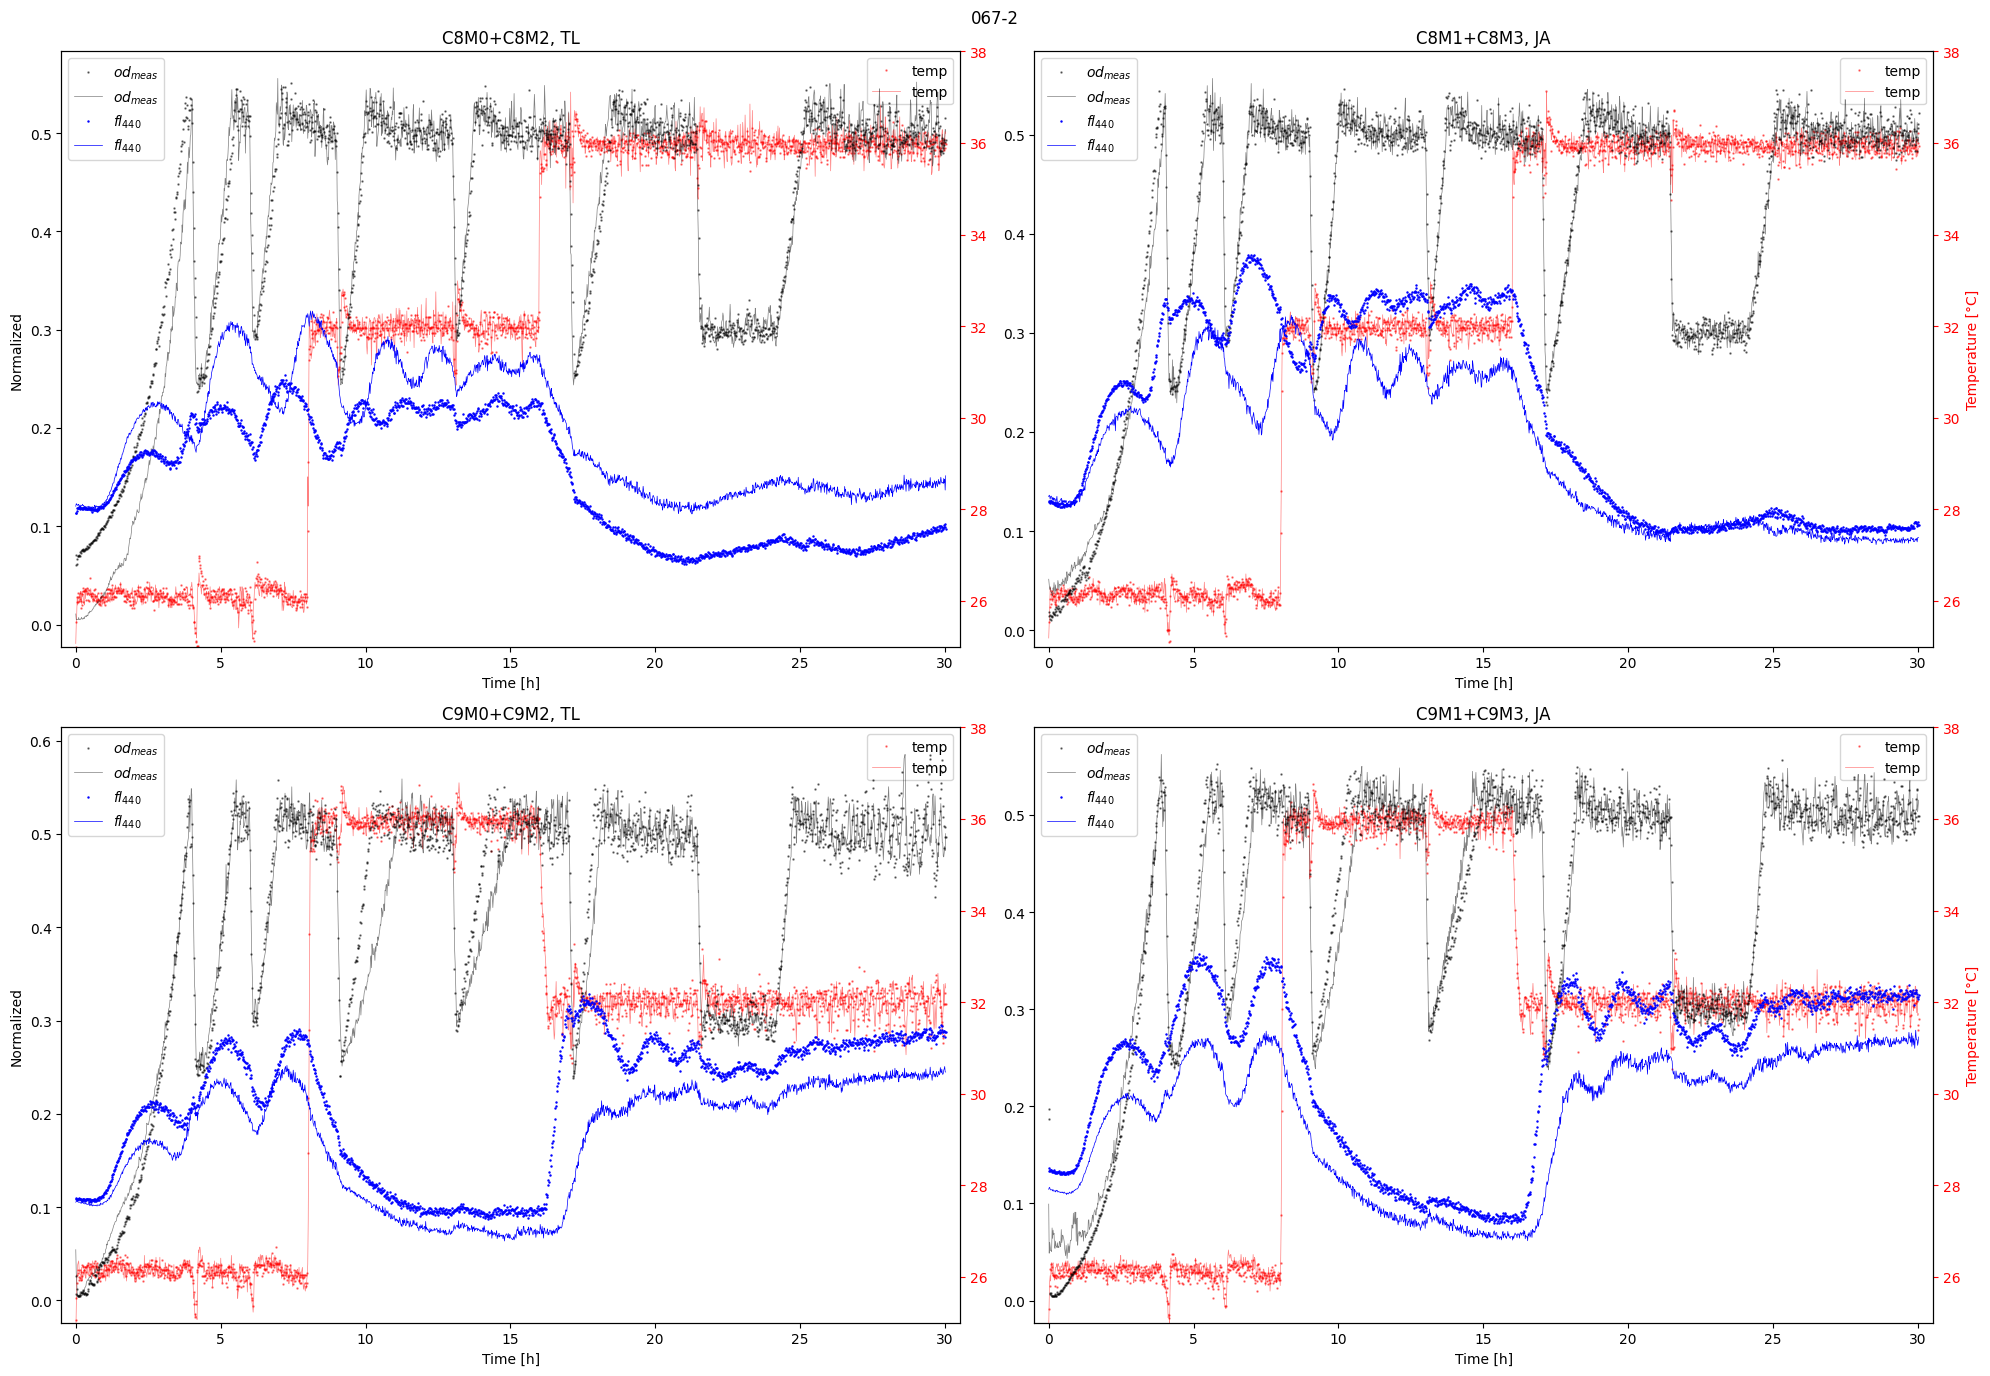

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from run import CbData
from paramsData import CbDataParam
from params import Params
import os

# SPECIFY DATA
data_name = '067-2'
cbParam = CbDataParam(data_name)
# cbParam.sampcycle = np.array([[0,1800] for i in range(cbParam.n_reactors)])
cbData = CbData(cbParam.path, cbParam.file_ind, cbParam.sampcycle, cbParam.n_reactors)

parameters = Params().default

# ANALYSIS
cbParam.n_reactors = 4
cbParam.titles = ['C8M0+C8M2, TL', 'C8M1+C8M3, JA', '', '', 'C9M0+C9M2, TL' ,'C9M1+C9M3, JA']
b1_max = max(max(cbData.b1[j]) for j in range(cbParam.n_reactors))
e1_max = max(max(cbData.b1[j]*cbData.fl[j]) for j in range(cbParam.n_reactors))
n_rows = math.ceil(cbParam.n_reactors/2)
n_culumns = 2 if cbParam.n_reactors > 1 else 1
matplotlib.style.use('default')
fig, ax = plt.subplots(n_rows,n_culumns)
fig.set_figheight(n_rows*7)
fig.set_figwidth(n_culumns*10)
if n_culumns == 1:
    ax = [ax]
if n_rows == 1:
    ax = [ax]
for j in range(cbParam.n_reactors):
    r = j//2
    c = j%2
    # j = 1
    if j > 1:
        j += 2

    axr = ax[r][c].twinx()
    ax[r][c].set_zorder(2)
    axr.set_zorder(1)
    ax[r][c].patch.set_visible(False)
    p1_tot = np.add.accumulate(cbData.p1[j])
    p2_tot = np.add.accumulate(cbData.p2[j])

    axr.plot(cbData.time_h[j],cbData.temp[j],'.r',markersize = 1.5, alpha=0.5, label = 'temp')
    axr.plot(cbData.time_h[j+2],cbData.temp[j+2],'r',lw=0.5, alpha=0.5, label = 'temp')
    # axr.plot(cbData.time_h[j],cbData.temp_sp[j],'r',lw=0.5, alpha=1, label = 'temp_sp')
    # axr.plot(cbData.time_h[j],cbData.temp_ext[j],'b',lw=0.5, alpha=1, label = 'temp_ext')
    axr.plot(cbData.time_h[j],cbData.temp_int[j],'m',lw=0.5, alpha=1, label = 'temp_int')
    # ax[r][c].plot(cbData.time_h[j],cbData.hr[j]*100,'k',lw=0.5, alpha=0.5, label = '$hr_{meas}*100$')
    ax[r][c].plot(cbData.time_h[j],cbData.od[j],'.k', markersize = 1.5, alpha=0.5, label = '$od_{meas}$')
    ax[r][c].plot(cbData.time_h[j+2],cbData.od[j+2],'k', lw=0.5, alpha=0.5, label = '$od_{meas}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl[j]*cbData.b1[j]/e1_max,'.g',markersize = 1.5, label = '$e1_{meas,norm}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl2[j]*cbData.b1[j]/e1_max,'.g',alpha = 0.5, markersize = 1.5, label = '$e2_{meas,norm}$')
    ax[r][c].plot(cbData.time_h[j],cbData.fl[j],'.', color = '#0000ff',markersize = 1.5, alpha = 1, label = '$fl_{440}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl2[j],'.', color = '#00a9ff',markersize = 1.5, alpha = 1, label = '$fl_{470}$')
    # ax[r][c].plot(cbData.time_h[j],p1_tot/p1_tot[-1],'.m',markersize = 1.5, alpha = 0.5, label = '$p1$')
    # ax[r][c].plot(cbData.time_h[j],p2_tot/p2_tot[-1],'.g',markersize = 1.5, alpha = 0.5, label = '$p2$')
    ax[r][c].plot(cbData.time_h[j+2],cbData.fl[j+2], color = '#0000ff',lw = 0.5, alpha = 1, label = '$fl_{440}$')
    
    ax[r][c].legend(loc="upper left")
    axr.legend(loc="upper right")
    # axr.legend(loc="upper right")
    if (j%2 == 0):
        ax[r][c].set_ylabel("Normalized")
    else:
        axr.set_ylabel('Temperature [°C]', color='r')
        ax[r][c].tick_params(axis='y', labelleft=True)
    axr.tick_params(axis='y', color='r', labelcolor='r')
    ax[r][c].set_xlabel("Time [h]")
    ax[r][c].set_xlim([cbData.time_h[j][0]-0.5,cbData.time_h[j][-1]+0.5])
    # ax[r][c].set_ylim([-5,105])
    axr.set_ylim([25,38])
    ax[r][c].set_title(cbParam.titles[j])
# TODO: Set titles
fig.suptitle(data_name)
fig.tight_layout()
results_dir = "Images/{}".format(data_name)
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)
fig.savefig(results_dir+"/analysis_fl_comp.png")

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from paramsData import CbDataParam
from params import Params
import os
import glob
import pandas as pd

class CbData:
    def __init__(self, cbParam, data_name):
        cb_files = sorted(glob.glob(cbParam.path + "/*.csv"))
        cb_dfs = []
        for i in cbParam.file_ind:
            df = pd.read_csv(cb_files[i], index_col=None, header=0)
            cb_dfs.append(df)

        self.time, self.time_h, self.temp, self.fl_440, self.fl_470, self.b1 = [], [], [], [], [], []
        self.a410, self.a440, self.a470, self.a510, self.a550, self.aClear = [], [], [], [], [], []
        for j in range(cbParam.n_reactors):
            time = cb_dfs[j]["exp_time"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy()
            self.time.append(time-time[0])
            self.time_h.append(self.time[j]/3600)
            self.temp.append(cb_dfs[j]["media_temp"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
            self.fl_440.append(cb_dfs[j]["FP1_emit1"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
            self.fl_470.append(cb_dfs[j]["FP1_emit2"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
            self.b1.append(cb_dfs[j]["FP1_base"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
            if data_name == '051-1':
                if (j < 4):
                    self.a410.append(cb_dfs[j]["LEDA_410"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a440.append(cb_dfs[j]["LEDA_440"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a470.append(cb_dfs[j]["LEDA_470"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a510.append(cb_dfs[j]["LEDA_510"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a550.append(cb_dfs[j]["LEDA_550"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.aClear.append(cb_dfs[j]["LEDA_CLEAR"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                else:
                    self.a410.append(cb_dfs[j]["Em_nm410_Ex_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a440.append(cb_dfs[j]["Em_nm440_Ex_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a470.append(cb_dfs[j]["Em_nm470_Ex_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a510.append(cb_dfs[j]["Em_nm510_Ex_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.a550.append(cb_dfs[j]["Em_nm550_Ex_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                    self.aClear.append(cb_dfs[j]["Em_CLEAR_Ex_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
            else:
                self.a410.append(cb_dfs[j]["Em_nm410_Ex_395_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                self.a440.append(cb_dfs[j]["Em_nm410_Ex_457_LEDB"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                self.a470.append(cb_dfs[j]["Em_nm410_Ex_500_LEDC"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                self.a510.append(cb_dfs[j]["Em_nm410_Ex_523_LEDD"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                self.a550.append(cb_dfs[j]["Em_nm410_Ex_595_LEDE"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
                self.aClear.append(cb_dfs[j]["Em_nm440_Ex_395_LEDA"][cbParam.sampcycle[j][0]:cbParam.sampcycle[j][-1]+1].to_numpy())
            

# SPECIFY DATA
data_name = '067-2'
cbParam = CbDataParam(data_name)
cbData = CbData(cbParam, data_name)

# ANALYSIS
# cbParam.n_reactors = 1
n_rows = math.ceil(cbParam.n_reactors/2)
n_culumns = 2 if cbParam.n_reactors > 1 else 1
matplotlib.style.use('default')
fig, ax = plt.subplots(n_rows,n_culumns,sharey='all')
fig.set_figheight(n_rows*7)
fig.set_figwidth(n_culumns*10)
if n_culumns == 1:
    ax = [ax]
if n_rows == 1:
    ax = [ax]
for j in range(cbParam.n_reactors):
    r = j//2
    c = j%2
    # j = 1

    axr = ax[r][c].twinx()
    ax[r][c].set_zorder(2)
    axr.set_zorder(1)
    ax[r][c].patch.set_visible(False)

    # axr.plot(cbData.time_h[j],cbData.temp[j],'--r',lw=0.5, alpha=0.5)
    axr.plot(cbData.time_h[j],cbData.a410[j]/cbData.aClear[j],color='#7e00db',lw=1, alpha=1, label = '410/clear')
    axr.plot(cbData.time_h[j],cbData.a440[j]/cbData.aClear[j],color='#0000ff',lw=1, alpha=1, label = '440/clear')
    axr.plot(cbData.time_h[j],cbData.a470[j]/cbData.aClear[j],color='#00a9ff',lw=1, alpha=1, label = '470/clear')
    axr.plot(cbData.time_h[j],cbData.a510[j]/cbData.aClear[j],color='#00ff00',lw=1, alpha=1, label = '510/clear')
    axr.plot(cbData.time_h[j],cbData.a550[j]/cbData.aClear[j],color='#a3ff00',lw=1, alpha=1, label = '550/clear')
    # axr.plot(cbData.time_h[j],cbData.fl_440[j],'.', color = '#0000ff',markersize = 0.5, alpha = 1, label = '$fl_{440}$')
    # axr.plot(cbData.time_h[j],cbData.fl_470[j],'.', color = '#00a9ff',markersize = 0.5, alpha = 1, label = '$fl_{470}$')

    # ax[r][c].plot(cbData.time_h[j],cbData.b1[j],'k',lw=.5, alpha=1, label = 'b1')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl_440[j]*cbData.b1[j], color = '#0000ff',lw = 0.5, alpha = 1, label = '$fl_{440}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl_470[j]*cbData.b1[j], color = '#00a9ff',lw = 0.5, alpha = 1, label = '$fl_{470}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.a410[j],'.',color='#7e00db',markersize=.5, alpha=1, label = '410')
    # ax[r][c].plot(cbData.time_h[j],cbData.a440[j],'.',color='#0000ff',markersize=.5, alpha=1, label = '440')
    # ax[r][c].plot(cbData.time_h[j],cbData.a470[j],'.',color='#00a9ff',markersize=.5, alpha=1, label = '470')
    # ax[r][c].plot(cbData.time_h[j],cbData.a510[j],'.',color='#00ff00',markersize=.5, alpha=1, label = '510')
    # ax[r][c].plot(cbData.time_h[j],cbData.a550[j],'.',color='#a3ff00',markersize=.5, alpha=1, label = '550')
    # ax[r][c].plot(cbData.time_h[j],cbData.aClear[j],'.k', markersize=.5, alpha=1, label = 'Clear')

    ax[r][c].legend(loc="upper left")
    axr.legend(loc="upper right")
    if (j%2 == 0):
        ax[r][c].set_ylabel("Intensity at emission band wavelength")
    else:
        axr.set_ylabel('Relative intensity at emission band wavelength')
        ax[r][c].tick_params(axis='y', labelleft=True)
    ax[r][c].set_xlabel("Time [h]")
    ax[r][c].set_xlim([cbData.time_h[j][0]-0.5,cbData.time_h[j][-1]+0.5])
    # axr.set_ylim([0,0.35])
    # axr.set_ylim([25,38])
    ax[r][c].set_title(cbParam.titles[j])
# TODO: Set titles
fig.suptitle(data_name)
fig.tight_layout()
results_dir = "Images/{}".format(data_name)
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)
fig.savefig(results_dir+"/analysis_spec.png")

cb_fc_ec information of 067-2 not given.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

IndexError: index 2303 is out of bounds for axis 0 with size 1801

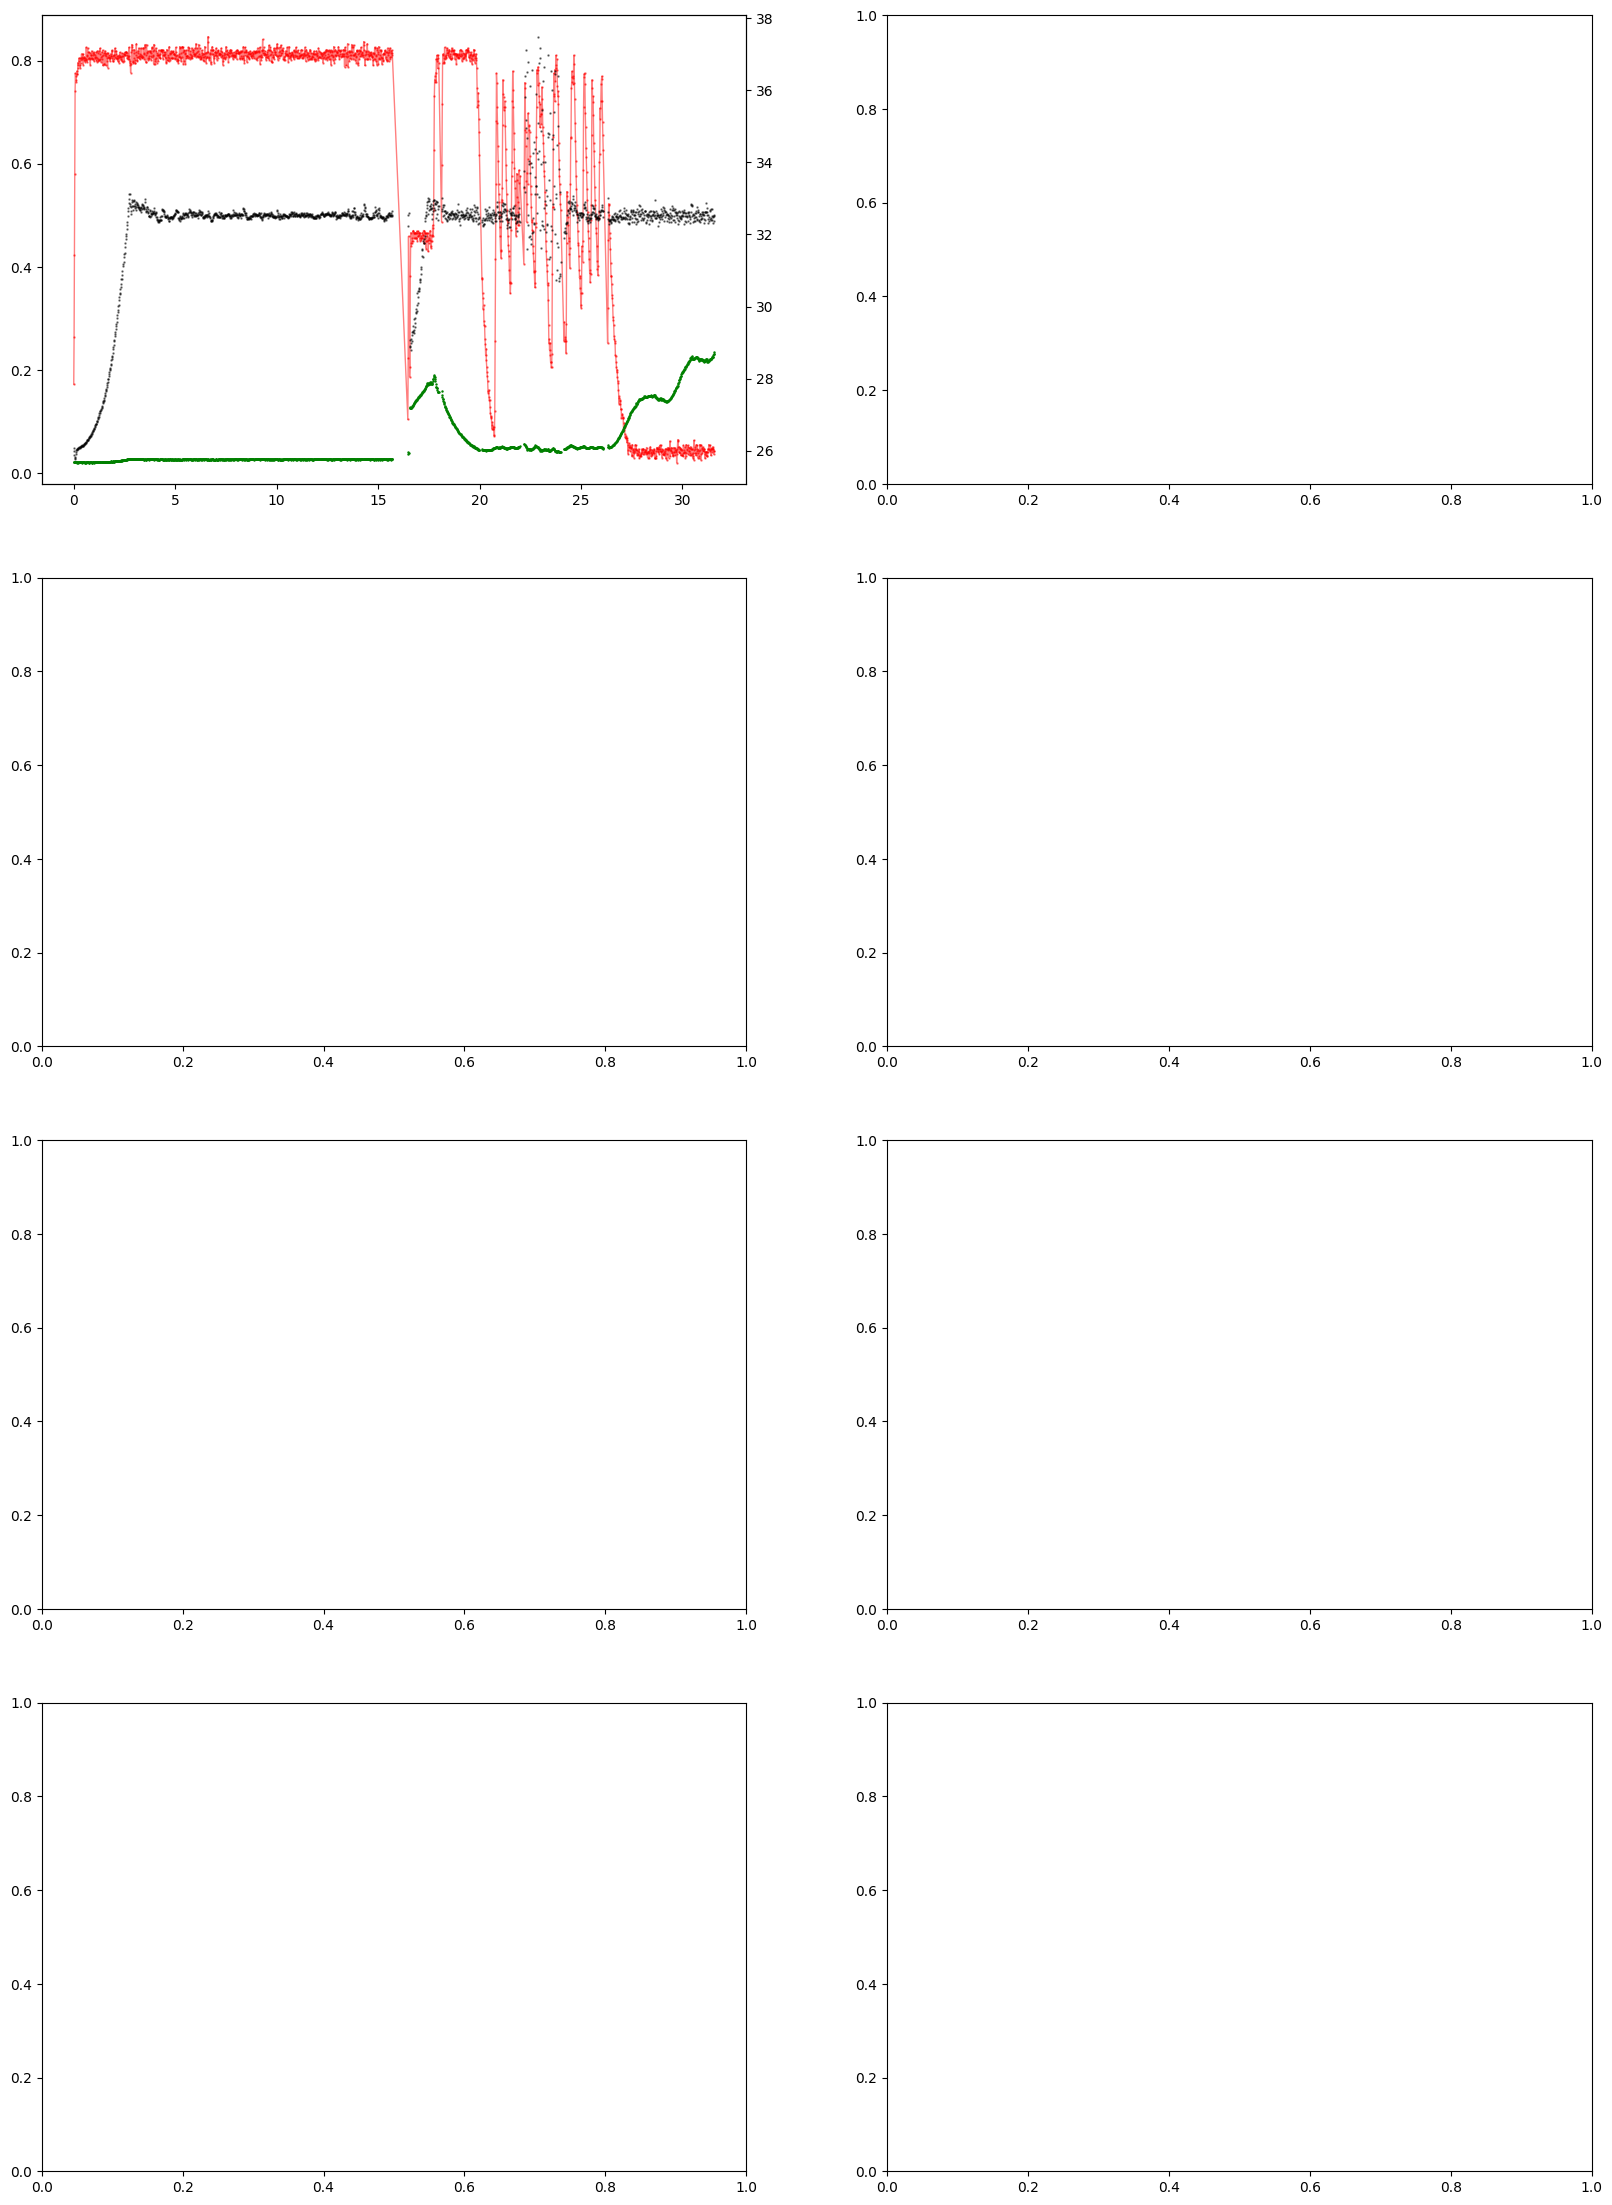

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from run import CbData
from paramsData import CbDataParam
from params import Params
import os

# SPECIFY DATA
data_name = '064-2'
cbParam = CbDataParam(data_name)
sampcycle = cbParam.sampcycle.copy()
cbParam.sampcycle = np.array([[0,3000] for i in range(cbParam.n_reactors)])
cbData = CbData(cbParam.path, cbParam.file_ind, cbParam.sampcycle, cbParam.n_reactors)

parameters = Params().default

# ANALYSIS
b1_max = max(max(cbData.b1[j]) for j in range(cbParam.n_reactors))
e1_max = max(max(cbData.b1[j]*cbData.fl[j]) for j in range(cbParam.n_reactors))
n_rows = math.ceil(cbParam.n_reactors/2)
n_culumns = 2 if cbParam.n_reactors > 1 else 1
matplotlib.style.use('default')
fig, ax = plt.subplots(n_rows,n_culumns)
fig.set_figheight(n_rows*7)
fig.set_figwidth(n_culumns*10)
if n_culumns == 1:
    ax = [ax]
if n_rows == 1:
    ax = [ax]
for j in range(cbParam.n_reactors):
    r = j//2
    c = j%2
    # j = 1
    if j > 1:
        j += 2

    axr = ax[r][c].twinx()
    ax[r][c].set_zorder(2)
    axr.set_zorder(1)
    ax[r][c].patch.set_visible(False)

    axr.plot(cbData.time_h[j],cbData.temp[j],'.-r',markersize = 1.5, lw = 1, alpha=0.5, label = 'temp')
    # axr.plot(cbData.time_h[j],cbData.temp_sp[j],'r',lw=0.5, alpha=1, label = 'temp_sp')
    # axr.plot(cbData.time_h[j],cbData.temp_ext[j],'b',lw=0.5, alpha=1, label = 'temp_ext')
    # axr.plot(cbData.time_h[j],cbData.temp_int[j],'m',lw=0.5, alpha=1, label = 'temp_int')
    # ax[r][c].plot(cbData.time_h[j],cbData.hr[j]*100,'k',lw=0.5, alpha=0.5, label = '$hr_{meas}*100$')
    ax[r][c].plot(cbData.time_h[j],cbData.od[j],'.k', markersize = 1.5, alpha=0.5, label = '$od_{meas}$')
    ax[r][c].plot(cbData.time_h[j],cbData.fl[j]*cbData.b1[j]/e1_max,'.g',markersize = 1.5, label = '$e1_{meas,norm}$')
    ax[r][c].plot(cbData.time_h[j][sampcycle[j]],(100-cbParam.cb_fc_ec[j])/100.0,'xk',markersize = 10, label = '$p_{fc}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl2[j]*cbData.b1[j]/e1_max,'.g',alpha = 0.5, markersize = 1.5, label = '$e2_{meas,norm}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl[j]*cbData.b1,'.', color = '#0000ff',markersize = 1.5, alpha = 1, label = '$e1_{meas,norm}$')
    # ax[r][c].plot(cbData.time_h[j],cbData.fl2[j],'.', color = '#00a9ff',markersize = 1.5, alpha = 1, label = '$fl_{470}$')
    
    ax[r][c].legend(loc="upper left")
    axr.legend(loc="upper right")
    # axr.legend(loc="upper right")
    if (j%2 == 0):
        ax[r][c].set_ylabel("Normalized")
    else:
        axr.set_ylabel('Temperature [°C]', color='r')
        ax[r][c].tick_params(axis='y', labelleft=True)
    axr.tick_params(axis='y', color='r', labelcolor='r')
    ax[r][c].set_xlabel("Time [h]")
    ax[r][c].set_xlim([cbData.time_h[j][0]-0.5,cbData.time_h[j][-1]+0.5])
    # ax[r][c].set_ylim([-5,105])
    axr.set_ylim([25,38])
    ax[r][c].set_title(cbParam.titles[j])
# TODO: Set titles
fig.suptitle(data_name)
fig.tight_layout()
results_dir = "Images/{}".format(data_name)
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)
fig.savefig(results_dir+"/analysis_fl.png")